# Task 1: Complete EDA and Statistical Analysis for Insurance Data

This notebook performs a comprehensive exploratory data analysis (EDA), temporal trend analysis, correlation analysis, and basic statistical testing on the insurance dataset. It uses modular, object-oriented code from the `src` directory.

In [1]:
import sys
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Add the parent directory to the path to import our modules
sys.path.append(os.path.abspath(os.path.join('..')))

from src.data_loader import load_data
from src.eda import EDAAnalyzer
from src.visualizer import Visualizer
%matplotlib inline

## 1. Load the Data

Update the file path below to match your actual data file.

In [3]:
# Example: '../data/MachineLearningRating_v3.txt'
file_path = '../data/MachineLearningRating_v3.txt'
df = load_data(file_path)

if df is not None:
    display(df.head())
else:
    print('Data could not be loaded. Please check the file path and format.')

c:\Users\Eyoel\Desktop\Files\week3-insurance-assessemnt\src\data_loader.py:23: DtypeWarning: Columns (32,37) have mixed types. Specify dtype option on import or set low_memory=False.
  csv = pd.read_csv(filepath, sep=sep)


,UnderwrittenCoverID,PolicyID,TransactionMonth,IsVATRegistered,Citizenship,LegalType,Title,Language,Bank,AccountType,...,ExcessSelected,CoverCategory,CoverType,CoverGroup,Section,Product,StatutoryClass,StatutoryRiskType,TotalPremium,TotalClaims
0,145249,12827,2015-03-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
1,145249,12827,2015-05-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
2,145249,12827,2015-07-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0
3,145255,12827,2015-05-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,512.848070,0.0
4,145255,12827,2015-07-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0


## 2. Data Quality and Summarization

Initial checks for data types, missing values, and descriptive statistics.

In [3]:
if df is not None:
    analyzer = EDAAnalyzer(df)
    print('--- Data Info ---')
    analyzer.get_data_info()
    print('\n--- Summary Statistics ---')
    display(analyzer.get_summary_statistics())
    print('\n--- Missing Values ---')
    display(analyzer.check_missing_values())

--- Data Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000098 entries, 0 to 1000097
Data columns (total 52 columns):
 #   Column                    Non-Null Count    Dtype         
---  ------                    --------------    -----         
 0   UnderwrittenCoverID       1000098 non-null  int64         
 1   PolicyID                  1000098 non-null  int64         
 2   TransactionMonth          1000098 non-null  datetime64[ns]
 3   IsVATRegistered           1000098 non-null  bool          
 4   Citizenship               1000098 non-null  object        
 5   LegalType                 1000098 non-null  object        
 6   Title                     1000098 non-null  object        
 7   Language                  1000098 non-null  object        
 8   Bank                      854137 non-null   object        
 9   AccountType               959866 non-null   object        
 10  MaritalStatus             991839 non-null   object        
 11  Gender                    990562

,UnderwrittenCoverID,PolicyID,TransactionMonth,PostalCode,mmcode,RegistrationYear,Cylinders,cubiccapacity,kilowatts,NumberOfDoors,CustomValueEstimate,NumberOfVehiclesInFleet,SumInsured,CalculatedPremiumPerTerm,TotalPremium,TotalClaims
count,1.000098e+06,1.000098e+06,1000098,1.000098e+06,9.995460e+05,1.000098e+06,999546.000000,999546.000000,999546.000000,999546.000000,2.204560e+05,0.0,1.000098e+06,1.000098e+06,1.000098e+06,1.000098e+06
mean,1.048175e+05,7.956682e+03,2015-02-28 10:49:29.147423744,3.020601e+03,5.487770e+07,2.010225e+03,4.046642,2466.743258,97.207919,4.019250,2.255311e+05,NaN,6.041727e+05,1.178757e+02,6.190550e+01,6.486119e+01
min,1.000000e+00,1.400000e+01,2013-10-01 00:00:00,1.000000e+00,4.041200e+06,1.987000e+03,0.000000,0.000000,0.000000,0.000000,2.000000e+04,NaN,1.000000e-02,0.000000e+00,-7.825768e+02,-1.200241e+04
25%,5.514300e+04,4.500000e+03,2015-01-01 00:00:00,8.270000e+02,6.005692e+07,2.008000e+03,4.000000,2237.000000,75.000000,4.000000,1.350000e+05,NaN,5.000000e+03,3.224800e+00,0.000000e+00,0.000000e+00
50%,9.408300e+04,7.071000e+03,2015-04-01 00:00:00,2.000000e+03,6.005842e+07,2.011000e+03,4.000000,2694.000000,111.000000,4.000000,2.200000e+05,NaN,7.500000e+03,8.436900e+00,2.178333e+00,0.000000e+00
75%,1.391900e+05,1.107700e+04,2015-06-01 00:00:00,4.180000e+03,6.005842e+07,2.013000e+03,4.000000,2694.000000,111.000000,4.000000,2.800000e+05,NaN,2.500000e+05,9.000000e+01,2.192982e+01,0.000000e+00
max,3.011750e+05,2.324600e+04,2015-08-01 00:00:00,9.870000e+03,6.506535e+07,2.015000e+03,10.000000,12880.000000,309.000000,6.000000,2.655000e+07,NaN,1.263620e+07,7.442217e+04,6.528260e+04,3.930921e+05
std,6.329371e+04,5.290039e+03,NaN,2.649854e+03,1.360381e+07,3.261391e+00,0.294020,442.800640,19.393256,0.468314,5.645157e+05,NaN,1.508332e+06,3.997017e+02,2.302845e+02,2.384075e+03



--- Missing Values ---


,missing_count,missing_percentage
NumberOfVehiclesInFleet,1000098,100.000000
CrossBorder,999400,99.930207
CustomValueEstimate,779642,77.956560
Rebuilt,641901,64.183810
Converted,641901,64.183810
WrittenOff,641901,64.183810
NewVehicle,153295,15.327998
Bank,145961,14.594670
AccountType,40232,4.022806
Gender,9536,0.953507


## 3. Loss Ratio Analysis

Calculate the overall loss ratio and by key categories.

In [4]:
if df is not None:
    print('--- Overall Loss Ratio ---')
    overall_loss_ratio = analyzer.calculate_loss_ratio()
    print(f'Overall Loss Ratio: {overall_loss_ratio:.2%}')
    print('\n--- Loss Ratio by Province ---')
    display(analyzer.calculate_loss_ratio(group_by='Province'))
    print('\n--- Loss Ratio by Gender ---')
    display(analyzer.calculate_loss_ratio(group_by='Gender'))
    print('\n--- Loss Ratio by VehicleType ---')
    display(analyzer.calculate_loss_ratio(group_by='VehicleType'))

--- Overall Loss Ratio ---
Overall Loss Ratio: 104.77%

--- Loss Ratio by Province ---


,LossRatio
Province,
Gauteng,1.222018
KwaZulu-Natal,1.082693
Western Cape,1.059472
North West,0.790367
Mpumalanga,0.720897
Free State,0.680758
Limpopo,0.661199
Eastern Cape,0.633813
Northern Cape,0.282699



--- Loss Ratio by Gender ---


,LossRatio
Gender,
Not specified,1.059311
Male,0.883910
Female,0.821879



--- Loss Ratio by VehicleType ---


,LossRatio
VehicleType,
Heavy Commercial,1.628112
Medium Commercial,1.050251
Passenger Vehicle,1.048198
Light Commercial,0.232066
Bus,0.137292


## 4. Univariate Analysis: Distributions and Outliers

Visualize distributions and detect outliers in key numerical columns.

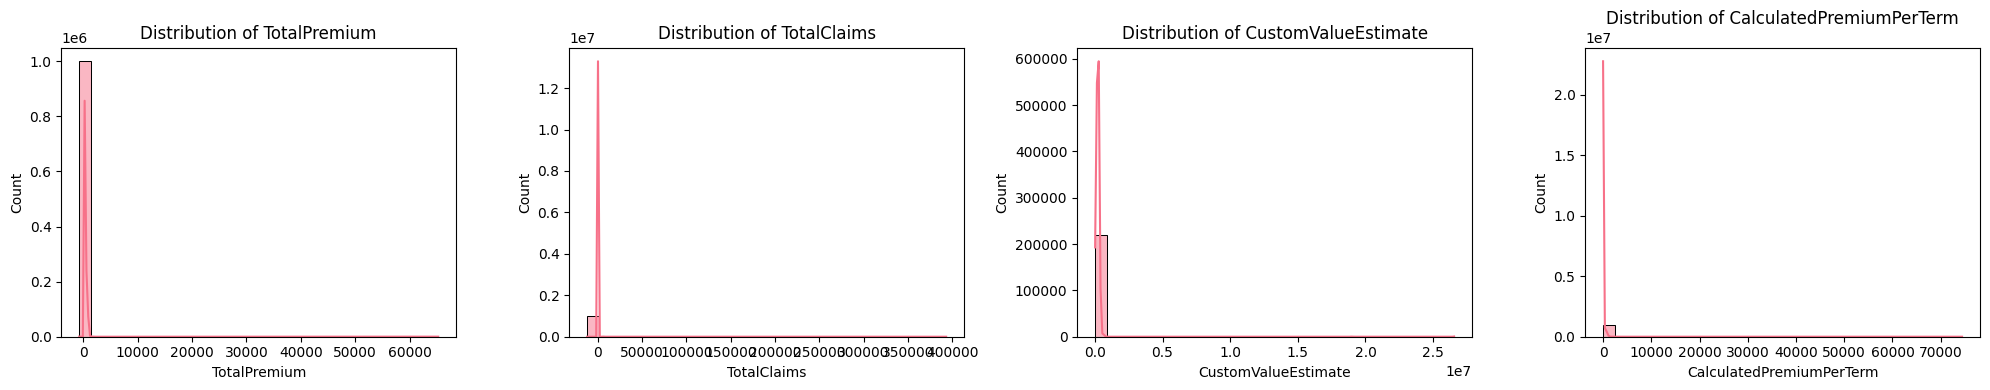

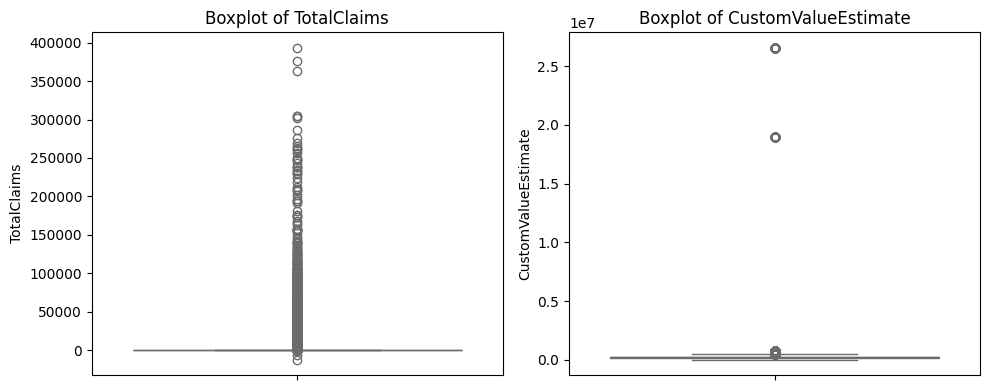

In [5]:
if df is not None:
    visualizer = Visualizer(df)
    numerical_cols = ['TotalPremium', 'TotalClaims', 'CustomValueEstimate', 'CalculatedPremiumPerTerm']
    visualizer.plot_distributions(numerical_cols)
    visualizer.plot_boxplots(['TotalClaims', 'CustomValueEstimate'])

## 5. Bivariate/Multivariate Analysis: Correlations and Associations

Explore relationships between variables using scatter plots and a correlation matrix.

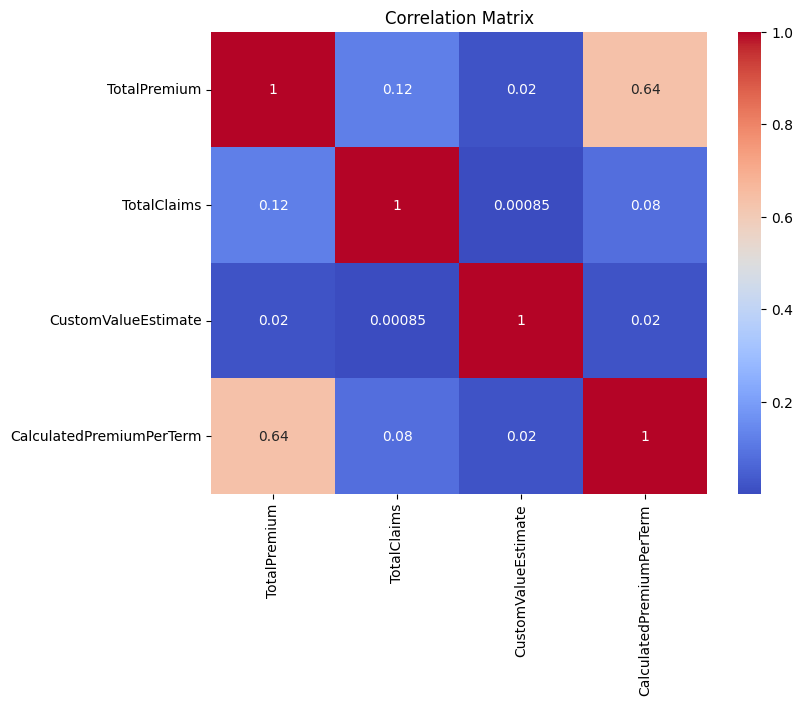

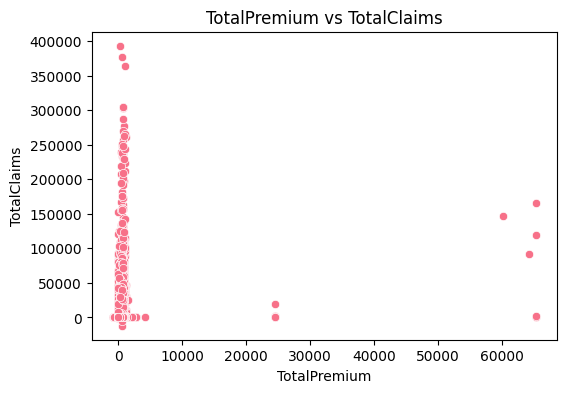

In [6]:
if df is not None:
    # Correlation matrix
    plt.figure(figsize=(8, 6))
    corr = df[['TotalPremium', 'TotalClaims', 'CustomValueEstimate', 'CalculatedPremiumPerTerm']].corr()
    sns.heatmap(corr, annot=True, cmap='coolwarm')
    plt.title('Correlation Matrix')
    plt.show()
    # Scatter plot: TotalPremium vs TotalClaims
    plt.figure(figsize=(6, 4))
    sns.scatterplot(x='TotalPremium', y='TotalClaims', data=df)
    plt.title('TotalPremium vs TotalClaims')
    plt.show()

## 6. Temporal Trend Analysis

Analyze claim frequency and severity over time (by TransactionMonth).

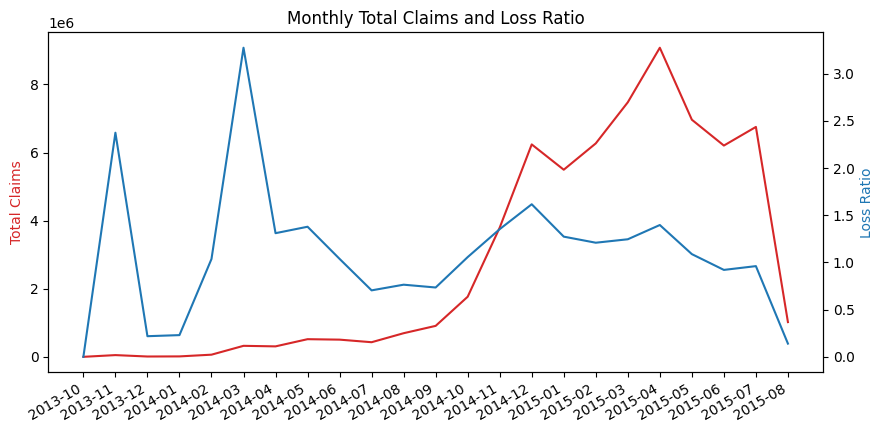

In [7]:
if df is not None and 'TransactionMonth' in df.columns:
    # Convert TransactionMonth to datetime if not already
    if not np.issubdtype(df['TransactionMonth'].dtype, np.datetime64):
        df['TransactionMonth'] = pd.to_datetime(df['TransactionMonth'], errors='coerce')
    monthly = df.groupby(df['TransactionMonth'].dt.to_period('M')).agg({'TotalClaims': 'sum', 'TotalPremium': 'sum', 'PolicyID': 'count'})
    monthly['LossRatio'] = monthly['TotalClaims'] / monthly['TotalPremium']
    monthly = monthly.sort_index()
    fig, ax1 = plt.subplots(figsize=(10, 5))
    ax1.plot(monthly.index.astype(str), monthly['TotalClaims'], label='Total Claims', color='tab:red')
    ax1.set_ylabel('Total Claims', color='tab:red')
    ax2 = ax1.twinx()
    ax2.plot(monthly.index.astype(str), monthly['LossRatio'], label='Loss Ratio', color='tab:blue')
    ax2.set_ylabel('Loss Ratio', color='tab:blue')
    plt.title('Monthly Total Claims and Loss Ratio')
    fig.autofmt_xdate()
    plt.show()

## 7. Claims by Vehicle Make

Which vehicle makes are associated with the highest claim amounts?

--- Average Claim Amount by Top 10 Vehicle Makes ---


,AvgClaimAmount,Count
make,,
SUZUKI,419.634546,408
JMC,191.684795,120
HYUNDAI,174.215195,2602
MARCOPOLO,156.794806,51
AUDI,137.843083,7407
POLARSUN,134.044800,934
B.A.W,132.934016,2160
FIAT,108.625642,984
BMW,90.558050,5317


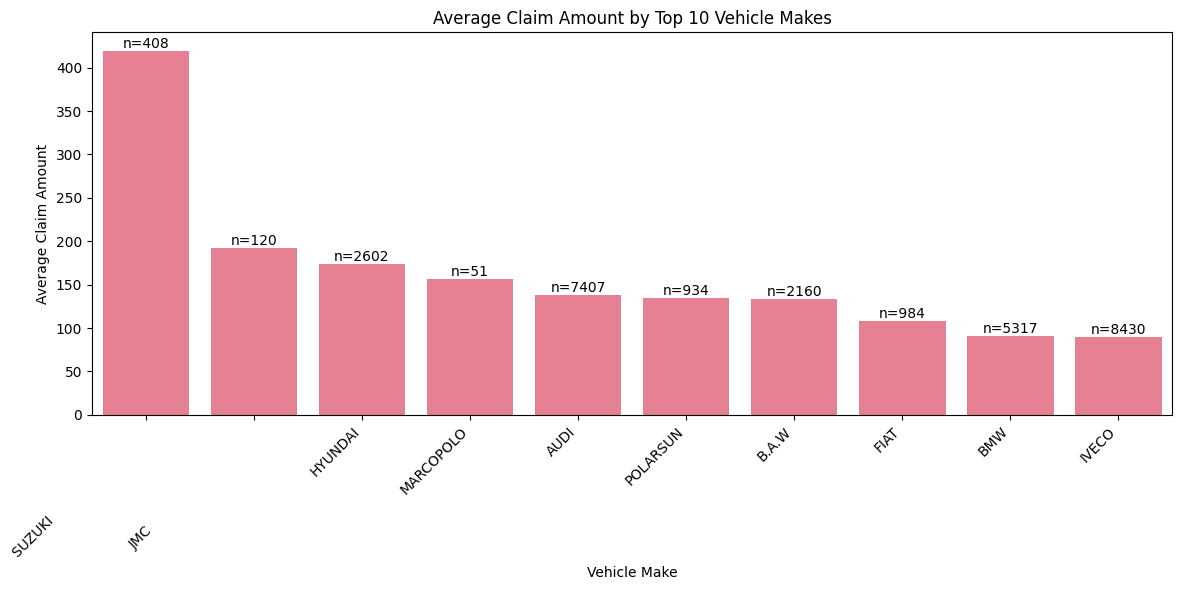

In [8]:
if df is not None:
    print('--- Average Claim Amount by Top 10 Vehicle Makes ---')
    display(analyzer.analyze_claims_by_vehicle(top_n=10))
    visualizer.plot_claims_by_make(top_n=10)

## 8. Statistical Testing Example: Gender and Loss Ratio

Test if there is a significant difference in loss ratio between genders using a t-test.

In [9]:
if df is not None and 'Gender' in df.columns:
    grouped = df.groupby('Gender').agg({'TotalClaims': 'sum', 'TotalPremium': 'sum'})
    grouped['LossRatio'] = grouped['TotalClaims'] / grouped['TotalPremium']
    print(grouped[['LossRatio']])
    # For t-test, get individual loss ratios per policy
    male = df[df['Gender'] == 'Male']
    female = df[df['Gender'] == 'Female']
    male_lr = male['TotalClaims'] / male['TotalPremium']
    female_lr = female['TotalClaims'] / female['TotalPremium']
    # Remove inf/nan
    male_lr = male_lr.replace([np.inf, -np.inf], np.nan).dropna()
    female_lr = female_lr.replace([np.inf, -np.inf], np.nan).dropna()
    t_stat, p_val = stats.ttest_ind(male_lr, female_lr, equal_var=False)
    print(f'T-test statistic: {t_stat:.3f}, p-value: {p_val:.3f}')
    if p_val < 0.05:
        print('There is a significant difference in loss ratio between genders.')
    else:
        print('No significant difference in loss ratio between genders.')

               LossRatio
Gender                  
Female          0.821879
Male            0.883910
Not specified   1.059311
T-test statistic: -0.599, p-value: 0.550
No significant difference in loss ratio between genders.


## 9. Creative Visualizations

Produce three creative and beautiful plots that capture key insights.

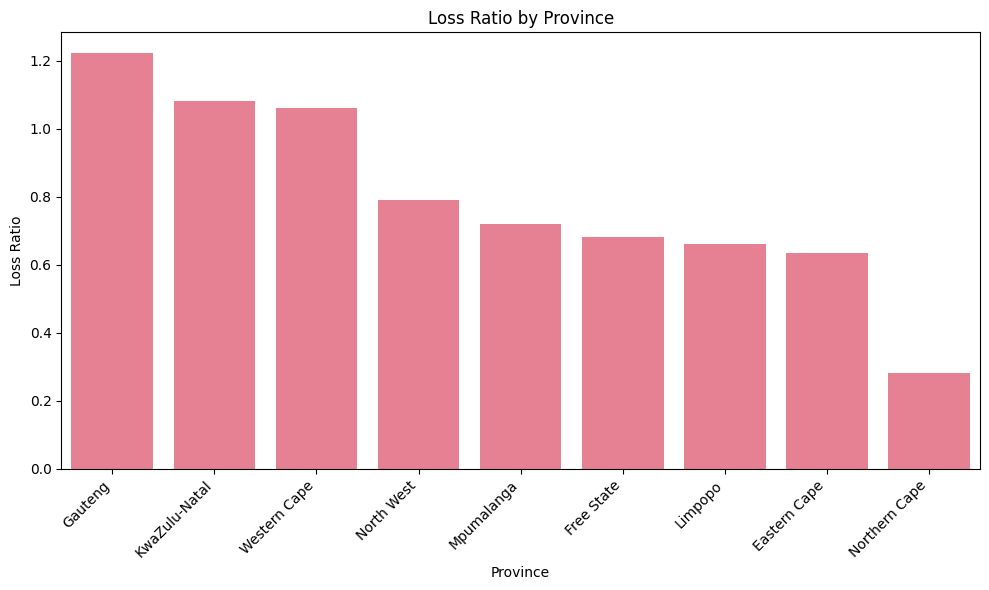

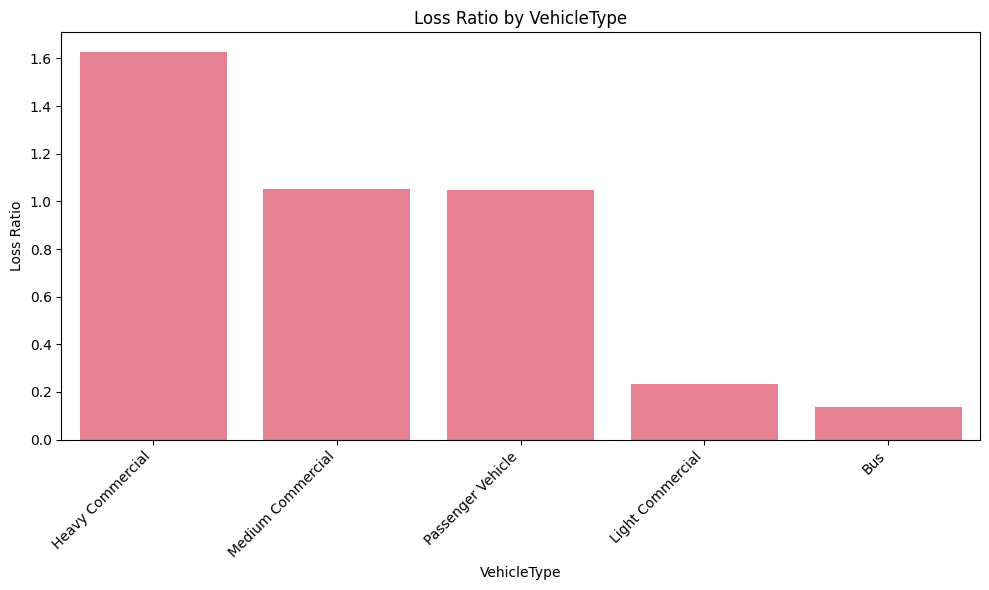

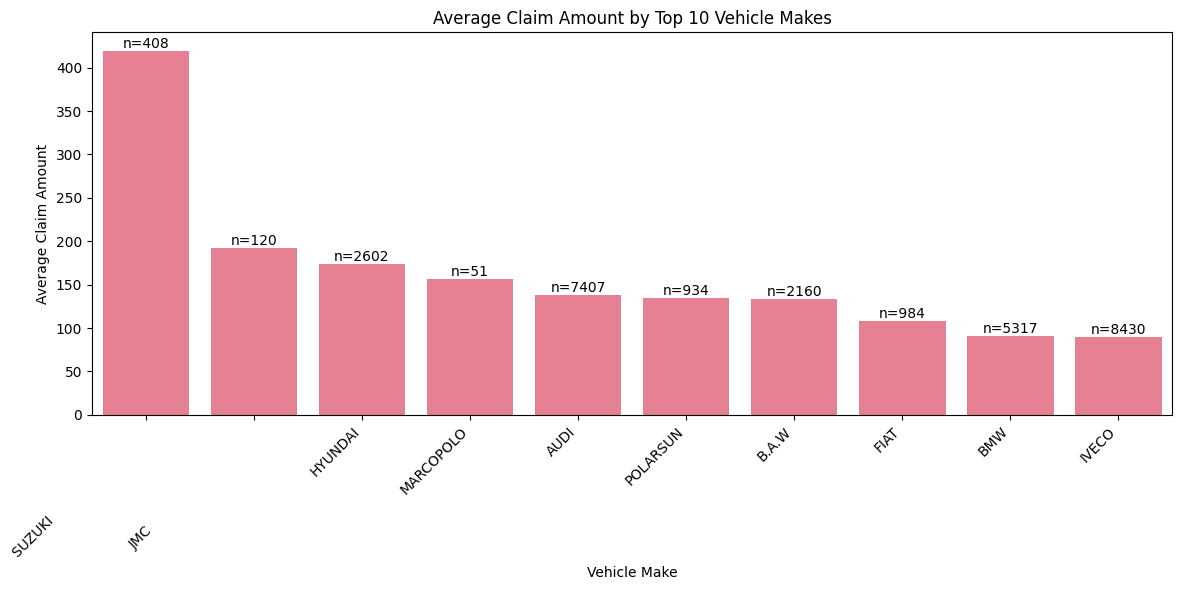

In [10]:
if df is not None:
    # 1. Loss Ratio by Province
    visualizer.plot_loss_ratio_by_category('Province')
    # 2. Loss Ratio by VehicleType
    visualizer.plot_loss_ratio_by_category('VehicleType')
    # 3. Claims by Make
    visualizer.plot_claims_by_make(top_n=10)

## 1. Temporal Trends: Claims Over Time

C:\Users\Eyoel\AppData\Local\Temp\ipykernel_26480\3281162326.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(monthly_claims['Month'].astype(str), rotation=45)


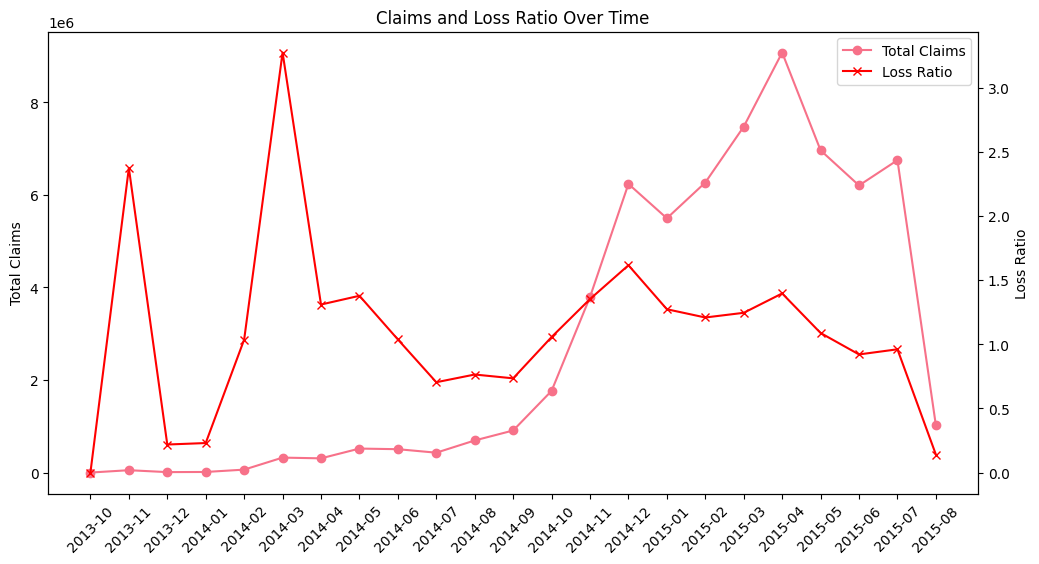

In [11]:
if df is not None:
    # Ensure TransactionMonth is datetime
    df['TransactionMonth'] = pd.to_datetime(df['TransactionMonth'], errors='coerce')
    monthly_claims = df.groupby(df['TransactionMonth'].dt.to_period('M')).agg({
        'TotalClaims': 'sum',
        'TotalPremium': 'sum',
        'PolicyID': 'nunique'
    }).rename_axis('Month').reset_index()
    monthly_claims['LossRatio'] = monthly_claims['TotalClaims'] / monthly_claims['TotalPremium']

    fig, ax1 = plt.subplots(figsize=(12,6))
    ax1.plot(monthly_claims['Month'].astype(str), monthly_claims['TotalClaims'], marker='o', label='Total Claims')
    ax1.set_ylabel('Total Claims')
    ax1.set_xticklabels(monthly_claims['Month'].astype(str), rotation=45)

    ax2 = ax1.twinx()
    ax2.plot(monthly_claims['Month'].astype(str), monthly_claims['LossRatio'], marker='x', color='red', label='Loss Ratio')
    ax2.set_ylabel('Loss Ratio')
    plt.title('Claims and Loss Ratio Over Time')
    fig.legend(loc='upper right', bbox_to_anchor=(1,1), bbox_transform=ax1.transAxes)
    plt.show()


## 2. Categorical Variable Distribution (Bar Charts)

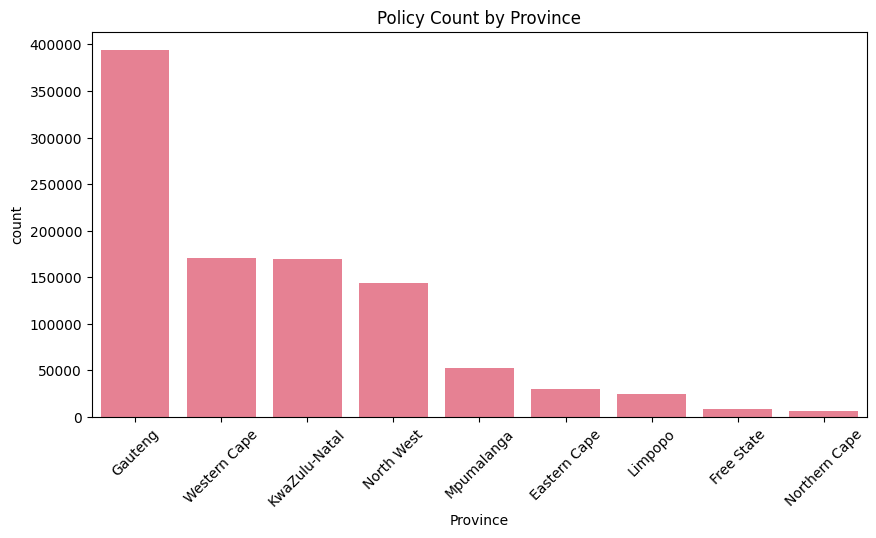

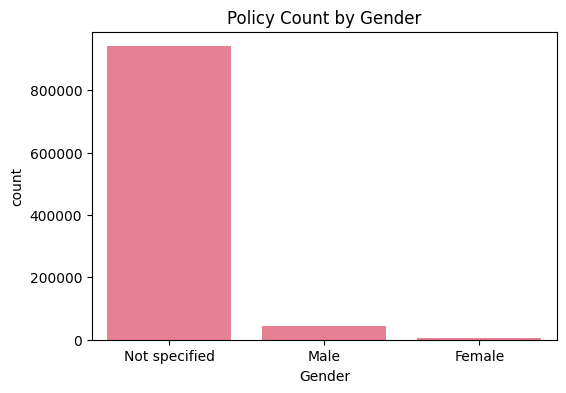

In [12]:
if df is not None:
    plt.figure(figsize=(10,5))
    sns.countplot(x='Province', data=df, order=df['Province'].value_counts().index)
    plt.title('Policy Count by Province')
    plt.xticks(rotation=45)
    plt.show()

    plt.figure(figsize=(6,4))
    sns.countplot(x='Gender', data=df)
    plt.title('Policy Count by Gender')
    plt.show()


## 3. Bivariate/Multivariate Analysis: Correlations & ZipCode

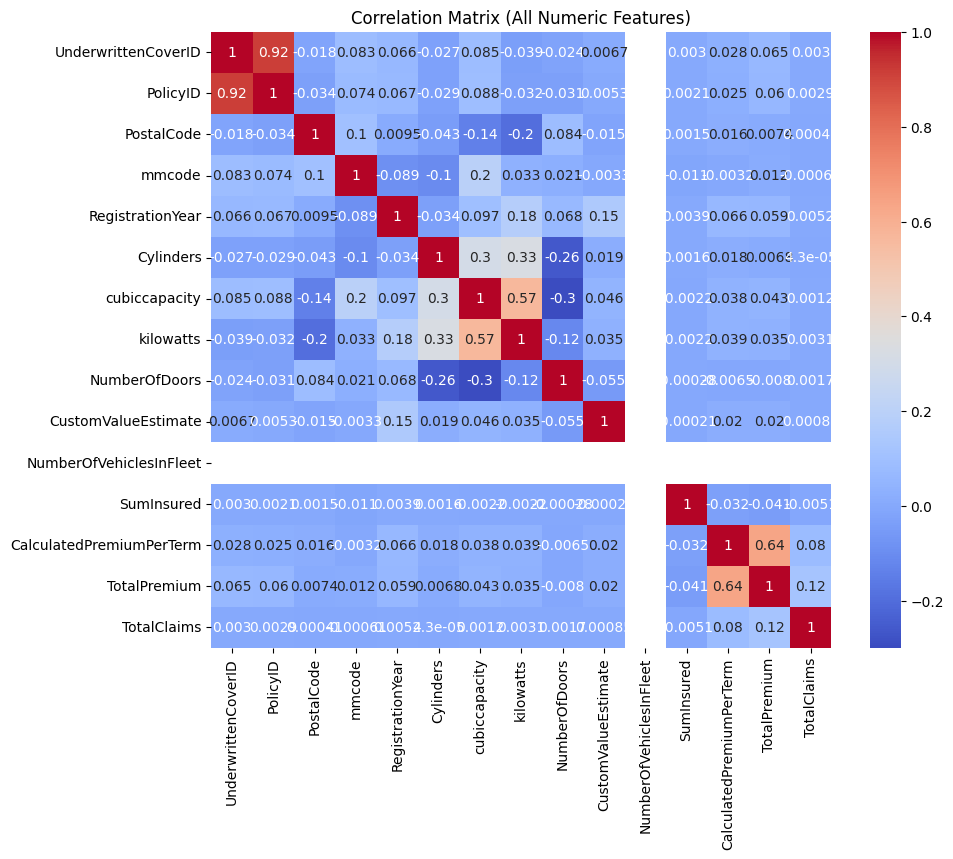

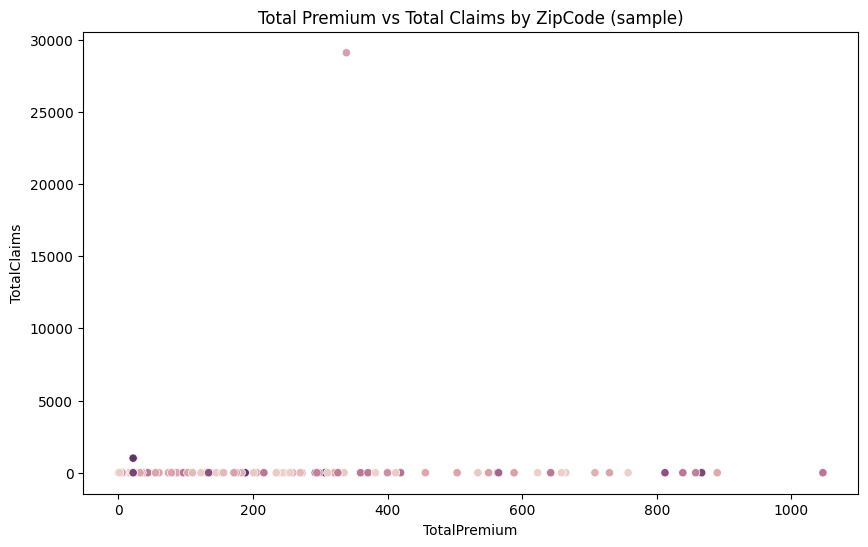

In [13]:
if df is not None:
    # Correlation matrix for all numerical columns
    plt.figure(figsize=(10,8))
    sns.heatmap(df.select_dtypes(include='number').corr(), annot=True, cmap='coolwarm')
    plt.title('Correlation Matrix (All Numeric Features)')
    plt.show()

    # Scatter plot for TotalPremium vs TotalClaims by ZipCode (sample for readability)
    sample = df.sample(min(500, len(df)), random_state=42)  # sample if too large
    plt.figure(figsize=(10,6))
    sns.scatterplot(data=sample, x='TotalPremium', y='TotalClaims', hue='PostalCode', legend=False)
    plt.title('Total Premium vs Total Claims by ZipCode (sample)')
    plt.show()


## 4. Trends Over Geography: Premium and Claims by Province & CoverType

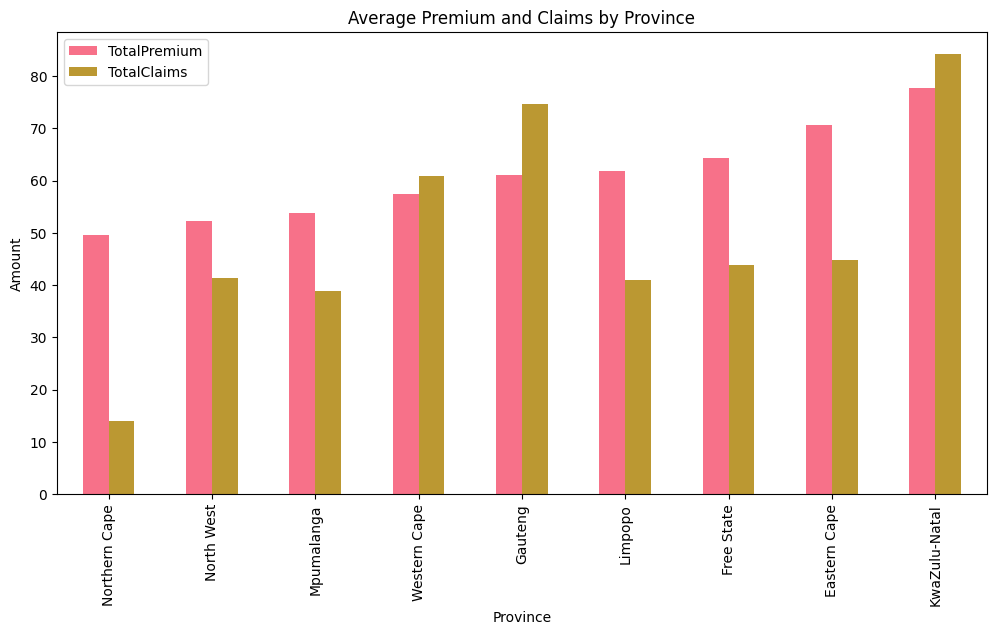

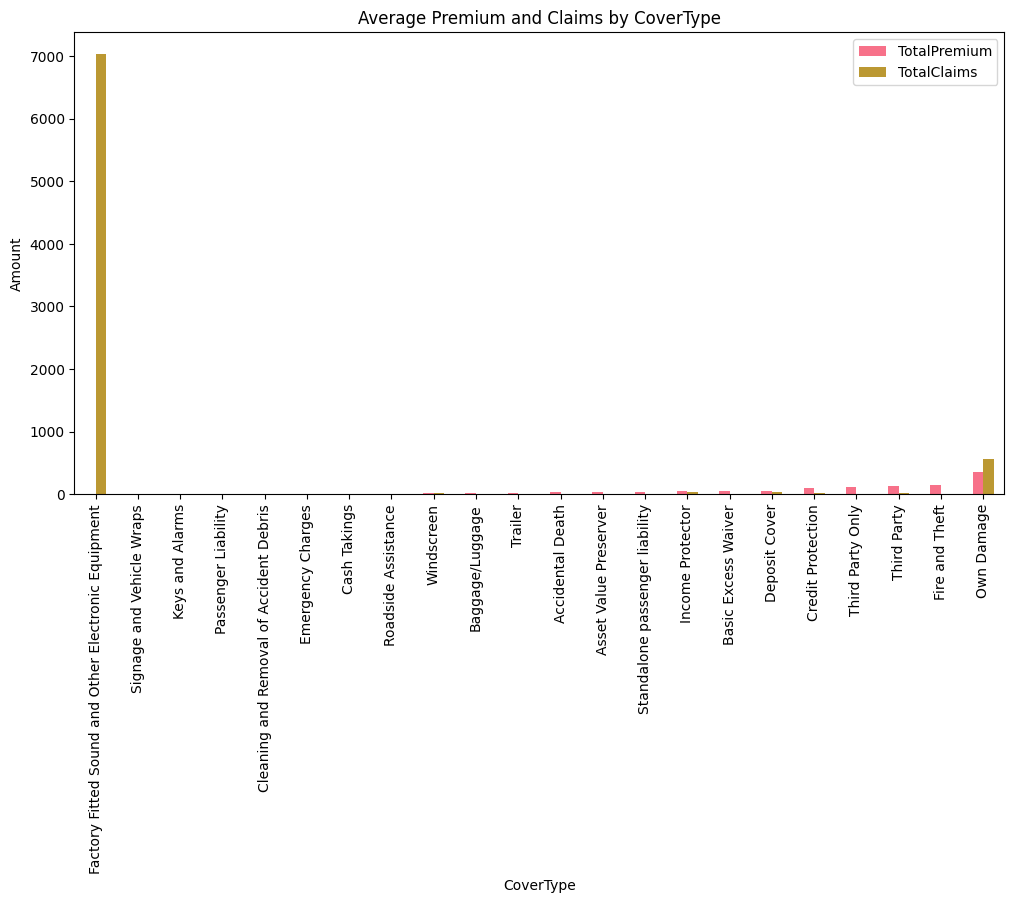

In [14]:
if df is not None:
    province_summary = df.groupby('Province').agg({'TotalPremium': 'mean', 'TotalClaims': 'mean'}).sort_values('TotalPremium')
    province_summary.plot(kind='bar', figsize=(12,6))
    plt.title('Average Premium and Claims by Province')
    plt.ylabel('Amount')
    plt.show()

    cover_summary = df.groupby('CoverType').agg({'TotalPremium': 'mean', 'TotalClaims': 'mean'}).sort_values('TotalPremium')
    cover_summary.plot(kind='bar', figsize=(12,6))
    plt.title('Average Premium and Claims by CoverType')
    plt.ylabel('Amount')
    plt.show()


## 5. Statistical Testing: Example Chi-Squared Test (Gender vs. High Risk)

In [15]:
if df is not None:
    # Create a binary variable: HighRisk if LossRatio > 1
    df['LossRatio'] = df['TotalClaims'] / df['TotalPremium']
    df['HighRisk'] = (df['LossRatio'] > 1).astype(int)
    contingency = pd.crosstab(df['Gender'], df['HighRisk'])
    chi2, p, dof, expected = stats.chi2_contingency(contingency)
    print('Chi-squared test for Gender vs. HighRisk (LossRatio > 1):')
    print(f'Chi2 = {chi2:.2f}, p-value = {p:.4f}')
    display(contingency)


Chi-squared test for Gender vs. HighRisk (LossRatio > 1):
Chi2 = 7.51, p-value = 0.0233


HighRisk,0,1
Gender,,
Female,6742,13
Male,42723,94
Not specified,938339,2651


---

# Conclusion

This notebook provided a comprehensive EDA, temporal trend analysis, correlation analysis, and a basic statistical test on the insurance dataset. Modify and extend the analysis as needed for your specific project requirements.